Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 128, 128, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
______________________________________________________________________________________________

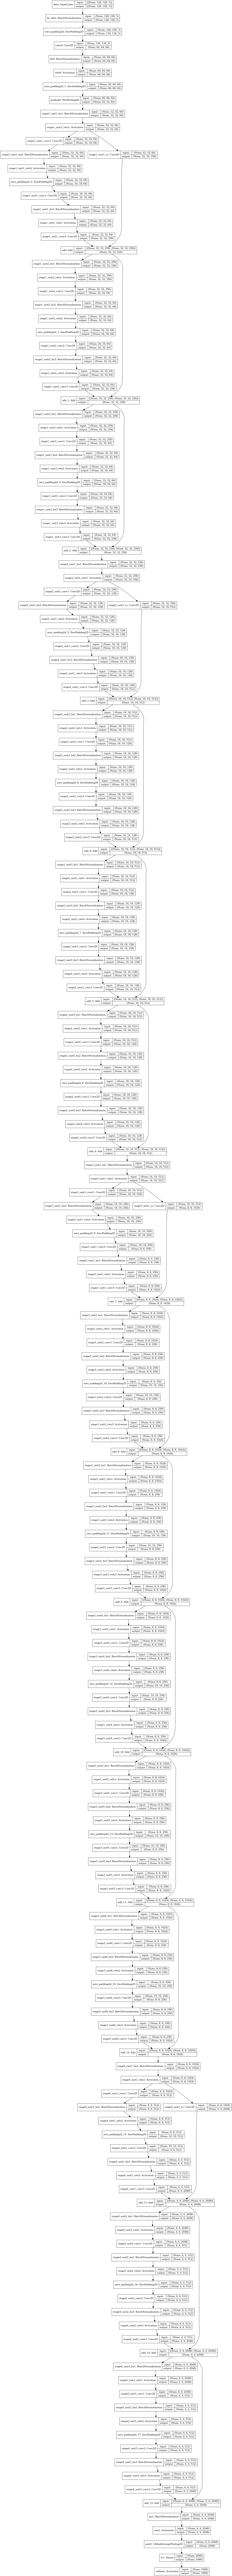

In [1]:
# for keras
from classification_models.keras import Classifiers
import tensorflow as tf

# for tensorflow.keras
# from classification_models.tfkeras import Classifiers

ResNet50, preprocess_input = Classifiers.get('resnet50')
model = ResNet50((128, 128, 3), weights='imagenet')
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [2]:
import os
os.environ['SM_FRAMEWORK'] = 'tf.keras'

In [3]:
import segmentation_models as sm
import tensorflow as tf

Segmentation Models: using `tf.keras` framework.


In [4]:
model = sm.Unet('resnet50', input_shape=(128, 128, 3), encoder_weights='imagenet', classes=1, decoder_filters=(256, 128, 64, 32, 16))

In [5]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 128, 128, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_18 (ZeroPadding2 (None, 134, 134, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 64, 64, 64)   9408        zero_padding2d_18[0][0]          
____________________________________________________________________________________________

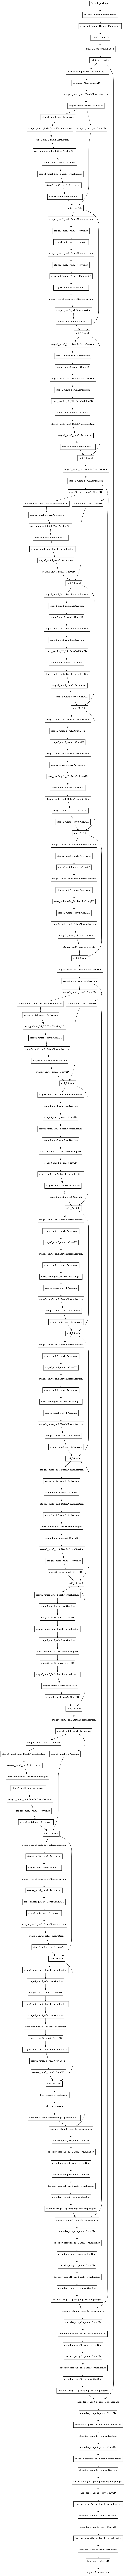

In [6]:
tf.keras.utils.plot_model(model)

In [7]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, UpSampling2D, Concatenate, Dense, BatchNormalization, Dropout, MaxPool2D, Input, SeparableConv2D, Lambda, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import backend as K

In [8]:
# finish this later on...
import tensorflow.keras as keras
class DataGenerator(keras.utils.Sequence):
  
  def __init__(self, batch_size = 8, image_size = 128):
    self.batch_size = batch_size
    self.image_size = image_size
    
  def load(self, rgb_file, depth_file):
    image = cv2.imread(rgb_file)
    image = cv2.resize(image, (self.image_size, self.image_size)) # resize...
    depth = cv2.imread(depth_file, -1)
    depth = cv2.resize(depth, (self.image_size, self.image_size)) 

    image_normalized = image/np.max(image)
    depth_normalized = depth/np.max(depth) # double check the depth images!
    return image_normalized, depth_normalized

  def load_all(self, rgb_files, depth_files):
        images = []
        depths = []
        for i in range(len(rgb_files)):
            img, dpth = self.load(rgb_files[i], depth_files[i])
            images.append(img)
            depths.append(dpth)
        return np.array(images), np.array(depths)

In [9]:
# Get file names
rgb_images = os.listdir('rgb/')
rgb_images.sort()
rgb_images = [str('rgb/') + file for file in rgb_images]
depth_images = os.listdir('depth/')
depth_images.sort()
depth_images = [str('depth/') + file for file in depth_images]

test_size = 20
rgb_images_test = rgb_images[:test_size]
depth_images_test = depth_images[:test_size]

rgb_images_train = rgb_images[test_size:]
depth_images_train = depth_images[test_size:]

# Load data:

load_data = DataGenerator()

X_train, y_train = load_data.load_all(rgb_files=rgb_images_train, 
                                      depth_files=depth_images_train)

X_test, y_test = load_data.load_all(rgb_files=rgb_images_test, 
                                  depth_files=depth_images_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(81, 128, 128, 3) (81, 128, 128)
(20, 128, 128, 3) (20, 128, 128)


In [14]:
model.compile('Adam', loss='mse', metrics=['acc'])

In [15]:
model.fit(X_train, y_train, batch_size=2, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
32/32 [==============================] - 6s 63ms/step - loss: 0.0117 - acc: 0.1153 - val_loss: 0.0328 - val_acc: 0.1185
Epoch 2/50
32/32 [==============================] - 1s 31ms/step - loss: 0.0103 - acc: 0.1153 - val_loss: 0.0200 - val_acc: 0.1157
Epoch 3/50
32/32 [==============================] - 1s 32ms/step - loss: 0.0089 - acc: 0.1148 - val_loss: 0.0210 - val_acc: 0.1152
Epoch 4/50
32/32 [==============================] - 1s 33ms/step - loss: 0.0088 - acc: 0.1158 - val_loss: 0.0231 - val_acc: 0.1185
Epoch 5/50
32/32 [==============================] - 1s 33ms/step - loss: 0.0084 - acc: 0.1165 - val_loss: 0.0251 - val_acc: 0.1039
Epoch 6/50
32/32 [==============================] - 1s 33ms/step - loss: 0.0071 - acc: 0.1145 - val_loss: 0.0336 - val_acc: 0.1173
Epoch 7/50
32/32 [==============================] - 1s 32ms/step - loss: 0.0083 - acc: 0.1152 - val_loss: 0.0590 - val_acc: 0.1201
Epoch 8/50
32/32 [==============================] - 1s 31ms/step - loss: 0.0101 - a